<a href="https://colab.research.google.com/github/Mann-05/Google-colab-ML/blob/main/Lab2-Computer-Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=3x+1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.19.0


We will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST. You can learn more about this dataset [here](https://github.com/zalandoresearch/fashion-mnist).

It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. You can see some examples here:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

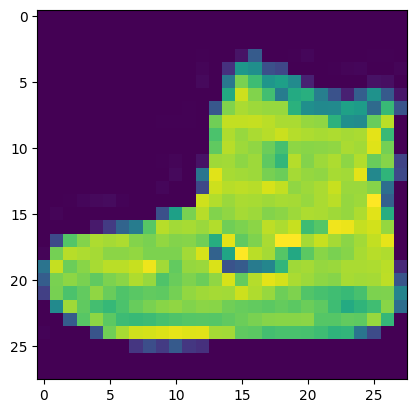

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

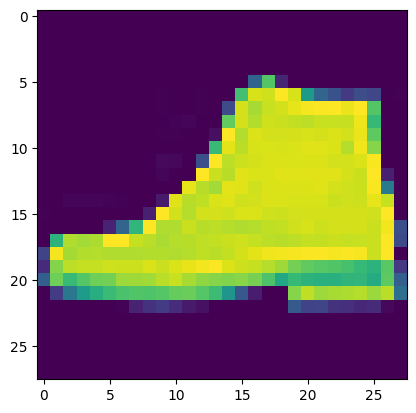

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [8]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7846 - loss: 0.6146
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8608 - loss: 0.3832
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8769 - loss: 0.3379
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8844 - loss: 0.3136
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8923 - loss: 0.2914


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [9]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8716 - loss: 0.3434


[0.3464243710041046, 0.8743000030517578]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this.

To explore further, try the below exercises:


# Exploration Exercises

###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [10]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[2.4041442e-06 3.7170989e-09 3.7928224e-08 3.6525758e-08 6.7010433e-08
 1.2097788e-02 4.7990461e-06 2.8980358e-02 6.3897241e-06 9.5890814e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does?

In [11]:
print(test_labels[0])

9


### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes



####Answer:
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list




####Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

##Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?



In [12]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.19.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - loss: 0.5845
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 0.3643
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.3224
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.2949
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.2751
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3713
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[2.7420521e-07 1.3652413e-09 8.2190665e-10 8.2026069e-10 5.1587685e-09
 1.5088432e-03 2.9560536e-07 3.1967901e-02 2.4888908e-07 9.6652246e-01]
9


###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

##Exercise 3:

What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.19.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7751 - loss: 0.6638
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8595 - loss: 0.3992
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8720 - loss: 0.3494
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8786 - loss: 0.3318
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8878 - loss: 0.3079
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8719 - loss: 0.3583
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[6.6304998e-04 8.7221460e-06 5.0675961e-05 6.7592437e-06 9.5536343e-05
 5.2181989e-02 6.4305350e-04 2.8740075e-01 2.6355372e-04 6.5868586e-01]
9


In [20]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

# THE UPDATED "BAD SCENARIO" MODEL
model = tf.keras.models.Sequential([
    # New Syntax: Explicitly define the input shape first
    tf.keras.Input(shape=(28, 28)),

    # BAD: This Dense layer still receives the unflattened (28x28) input.
    # It will treat the image as 28 independent rows.
    tf.keras.layers.Dense(64, activation=tf.nn.relu),

    # Flattening happening too late
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.19.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7785 - loss: 0.6399
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8674 - loss: 0.3730
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8809 - loss: 0.3345
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8860 - loss: 0.3160
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8932 - loss: 0.3007
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8746 - loss: 0.3477
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7.5249147e-07 9.6255688e-09 2.2324930e-06 1.1861950e-06 4.0580925e-08
 9.2193680e-03 2.6903797e-06 4.2518578e-02 5.3399810e-05 9.4820172e-01]
9


It is a fascinating observation! If the "Bad" method (Dense first $\rightarrow$ Flatten) is getting higher accuracy than the "Good" method (Flatten $\rightarrow$ Dense), it is likely because of a hidden variable: The Bottleneck Size.Even though the "Bad" method uses a "dumb" technique (applying the same rules to every row), it feeds significantly more information into the final decision layer than the standard "Good" model does.The "Hidden" MathLet's look at the shape of the data entering the final classification layer (the layer that actually decides "Shirt" vs "Shoe").1. The "Good" Model (Standard)Structure: Flatten $\rightarrow$ Dense(64) $\rightarrow$ Output(10)The Bottleneck: The huge image (784 pixels) is compressed down to just 64 numbers (neurons) before the final decision is made.Result: The final judge only has 64 clues to work with.2. The "Bad" Model (Your Experiment)Structure: Dense(64 on rows) $\rightarrow$ Flatten $\rightarrow$ Output(10)The Output of Layer 1: The first layer outputs a $28 \times 64$ grid.The Flattening: When you flatten that grid, you get $28 \times 64 = \mathbf{1,792}$ numbers.Result: The final judge has 1,792 clues to work with!The Analogy: The Summary vs. The NotesImagine you are trying to classify a book.The "Good" Method forces you to summarize the entire book onto one index card (64 neurons), and then make a decision based only on that card. If the summary misses a detail, you fail.The "Bad" Method forces you to summarize each page separately (using the same repetitive template), but then allows you to keep all the page summaries (1,792 numbers) to make your final decision.The "Bad" method works better here not because the architecture is smarter (it's actually dumber at feature extraction), but because the final layer is 28x wider, giving it more "memory" to memorize the training data.

##Exercise 4:

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [23]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.19.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6734
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3985
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3588
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3349
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3121
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3591
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.5449346e-05 1.3829133e-08 3.7616925e-07 1.5764837e-08 1.8714567e-06
 3.0737175e-03 3.0272962e-05 4.1676898e-02 1.1622338e-05 9.5517963e-01]
9


In [24]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

#model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
 #                                   tf.keras.layers.Dense(64, activation=tf.nn.relu),
  #                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.19.0
Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.12/dist-packages/tornado/platform/asyncio.py", line 211, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 645, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipython-input-1571336209.py", line 24, in <cell line: 0>

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 377, in fit

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 114, in one_step_on_data

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 61, in train_step

  File "/usr/local/lib/python3.12/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.12/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.12/dist-packages/keras/src/trainers/compile_utils.py", line 690, in __call__

  File "/usr/local/lib/python3.12/dist-packages/keras/src/trainers/compile_utils.py", line 699, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py", line 2330, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py", line 2000, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py", line 753, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 4 5 2 2 6 0 4 4 9 3 7 9 2 1 6 6 4 2 8 6 3 9 7 7 7 4 5 1 2 7 2 7
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_371241]

##This created an error because:
1.The Dataset: Fashion MNIST has 10 distinct categories (T-shirt, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot). The labels in training_labels are integers from 0 to 9.

2.The Model: You changed the final layer to Dense(5, activation=tf.nn.softmax). This means the model can only output probabilities for classes 0, 1, 2, 3, and 4.

3.The Crash: As soon as the training process encounters an image labeled "9" (Ankle boot) or "5" (Sandal), it tries to map it to one of the 5 output neurons. Since there is no 6th, 7th, or 10th neuron to handle those labels, the loss function crashes.

##Exercise 5:

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [25]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.19.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.5802
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.3690
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.3281
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.2994
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.2778
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3392
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[1.0990798e-05 8.3696750e-07 4.5253091e-07 2.6055602e-07 3.8987114e-06
 7.7388030e-01 4.2383040e-06 2.1256901e-02 7.8504894e-07 2.0484129e-01]
9


Neural networks learn in a hierarchy.

Layer 1: Might simply figure out where the edges and lines are.

Layer 2: Combines those lines to recognize shapes (circles, squares, loops).

Layer 3: Combines shapes to recognize objects (a shoe sole, a sleeve, a collar).

By adding a layer, you give the model an intermediate step to process information.
In this specific dataset (Fashion MNIST), the images are simple enough that 1 hidden layer is usually enough. But for color photos or complex objects, you often need 5, 10, or even 50 layers.

1.If you add too many layers for a simple problem, the model becomes too smart for its own good.

2.It stops learning general rules (e.g., "Trousers are long") and starts memorizing the training images pixel-by-pixel.

Result: You get 99% accuracy on training_images but low accuracy on test_images. This is called Overfitting.



#Exercise 6:

Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [26]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.19.0
Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.6392
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3873
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3369
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3153
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3000
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2797
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2628
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2558
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2480
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2366
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2260
Epoch 12/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2195
Epoch 13/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.2122
Epoch 14/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2041
Epoch 15/30
1875/1875

#Exercise 7:

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [27]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.19.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5768
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.3701
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.3268
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.3003
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.2818
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3485
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[4.2826142e-07 6.7348736e-08 6.6386086e-08 6.6210568e-08 8.7516888e-08
 1.1906113e-02 2.2726115e-06 7.7726794e-03 5.4590206e-08 9.8031813e-01]
9


In [28]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.19.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 13.9950
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.5493
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.5221
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.4976
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.4874
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5199
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[3.9264310e-16 9.7105604e-09 1.5739528e-20 1.4558580e-11 7.6206843e-24
 1.5703058e-02 1.2791690e-22 2.2875547e-02 1.8578440e-13 9.6142131e-01]
9


#Exercise 8:

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [30]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])




2.19.0
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7898 - loss: 0.5960
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8663 - loss: 0.3693
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8807 - loss: 0.3198
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8911 - loss: 0.2978
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8956 - loss: 0.2803
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9019 - loss: 0.2622
Epoch 7/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9038 - loss: 0.2528
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9038 - loss: 0.2528
